# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

In [2]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)

# Create Census Data

In [181]:
age=pd.read_csv("../data/acs/ACSDT5Y2019.B01002_2020-12-15T021141/data.csv",skiprows=1).iloc[:,[0,2]]
age['id']=age["id"].apply(lambda x:x[-5:])
age=age.rename({"Estimate!!Median age --!!Total:":"median_age"},axis=1)

In [182]:
pop=pd.read_csv("../data/acs/ACSDT5Y2019.B01003_2020-12-15T021819/data.csv",skiprows=1).iloc[:,[0,2]]
pop['id']=pop["id"].apply(lambda x:x[-5:])
pop=pop.rename({"Estimate!!Total":"pop","Geographic Area Name":"County Name"},axis=1)

In [183]:
race=pd.read_csv("../data/acs/ACSDT5Y2019.B02001_2020-12-15T045802/data.csv",skiprows=1).iloc[:,[0,6]]
race['id']=race["id"].apply(lambda x:x[-5:])
race=race.rename({"Estimate!!Total:!!Black or African American alone":"african_american",},axis=1)

In [119]:
inc=pd.read_csv("../data/acs/ACSDT5Y2019.B07011_2020-12-15T060656/data.csv",skiprows=1).iloc[:,[0,2]]
inc['id']=inc["id"].apply(lambda x:x[-5:])
inc=inc.rename({"Estimate!!Median income in the past 12 months --!!Total:":"median_income",'id':'fips'},axis=1)
inc['fips']=inc['fips'].apply(int)

In [186]:
lnd=pd.read_excel('../data/acs/LND01.xls')
lnd=lnd[['STCOU','LND110210D']]
lnd=lnd.rename({'STCOU':'id','LND110210D':'area'},axis=1)
lnd['id']=lnd['id'].apply(lambda x: str(x).zfill(5))

In [187]:
dataframes=[age,pop,race,inc,lnd]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['id']), dataframes)

In [188]:
df_merged['pop_density']=df_merged['pop']/df_merged['area']

In [190]:
df_merged.to_csv("../data/census.csv")

In [124]:
se=pd.read_csv('../data/socialexplorer/socialexplorer.csv',encoding = "ISO-8859-1")

In [125]:
tables=['T001_001','T002_002','T012_017','T012_018','T008_011','T008_012','T008_013','T044_001','T054_003','T055_010']
names=[]
tables=['SE_'+ t for t in tables]
se=se[['Geo_FIPS']+tables].copy()
se['over65']=se.iloc[:,3:8].sum(axis=1)
se=se.drop(se.columns[3:8],axis=1)
se=se.rename(columns=dict(zip(se.columns, ['fips','pop','pop_density','median_age','afr','hisp','over60'])))

In [127]:
se[['afr','hisp','over60']]=se[['afr','hisp','over60']].div(se['pop'],axis=0)*100

In [128]:
se

,fips,pop,pop_density,median_age,afr,hisp,over60
0,1001,54571,91.80,37.0,17.67,2.40,17.08
1,1003,182265,114.65,41.1,9.38,4.38,23.36
2,1005,27457,31.03,39.0,46.89,5.05,20.79
3,1007,22915,36.81,37.8,22.02,1.77,18.50
4,1009,57322,88.90,39.0,1.33,8.07,20.97
...,...,...,...,...,...,...,...
3216,72145,59662,1301.07,36.5,11.47,99.26,19.75
3217,72147,9301,183.21,40.0,28.14,94.34,23.70
3218,72149,26073,731.63,33.4,8.48,99.65,16.35
3219,72151,37941,687.16,36.7,14.06,99.33,19.06


In [129]:
se=pd.merge(se,inc,on="fips")#.drop("Unnamed: 0",axis=1)

In [130]:
se.to_csv("../data/socialexplorer.csv")

In [131]:
se

,fips,pop,pop_density,median_age,afr,hisp,over60,median_income
0,1001,54571,91.80,37.0,17.67,2.40,17.08,29725.0
1,1003,182265,114.65,41.1,9.38,4.38,23.36,29802.0
2,1005,27457,31.03,39.0,46.89,5.05,20.79,17963.0
3,1007,22915,36.81,37.8,22.02,1.77,18.50,21958.0
4,1009,57322,88.90,39.0,1.33,8.07,20.97,26976.0
...,...,...,...,...,...,...,...,...
3213,72145,59662,1301.07,36.5,11.47,99.26,19.75,NaN
3214,72147,9301,183.21,40.0,28.14,94.34,23.70,NaN
3215,72149,26073,731.63,33.4,8.48,99.65,16.35,NaN
3216,72151,37941,687.16,36.7,14.06,99.33,19.06,NaN


# Create Panel 

In [132]:
cov=pd.read_csv("../data/covid.csv")

In [133]:
cov

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
826397,2020-12-13,Sweetwater,Wyoming,56037.0,2451,14.0
826398,2020-12-13,Teton,Wyoming,56039.0,1905,2.0
826399,2020-12-13,Uinta,Wyoming,56041.0,1307,7.0
826400,2020-12-13,Washakie,Wyoming,56043.0,638,11.0


In [134]:
cases=cov[cov['date']=='2020-12-13'][['cases','fips','county','state']]

In [135]:
#spend=spend[(spend['freq']=='d')&(spend['month']==10)&(spend['day']==31)&(spend['spend_all'].notna())][['spend_all','countyfips']]

In [136]:
#Method 2
spend=pd.read_csv("../data/EconomicTracker-main/Affinity - County - Daily.csv").rename({"countyfips":"fips"},axis=1)
spend=spend[(spend['freq']=='d')&(spend['spend_all'].notna())]#[['spend_all','countyfips']]

In [138]:
emp= pd.read_csv("../data/EconomicTracker-main/Employment Combined - County - Daily.csv").rename({"countyfips":"fips"},axis=1)

In [139]:
emp['emp_combined']=emp['emp_combined'].apply(lambda x: None if x=='.' else float(x))
emp=emp.dropna().reset_index(drop=True)

In [140]:
sme= pd.read_csv("../data/EconomicTracker-main/Womply Merchants - County - Daily.csv").rename({"countyfips":"fips"},axis=1)

In [141]:
sme=sme.groupby("fips")['merchants_all'].mean().reset_index()

In [49]:
sme['date']=pd.to_datetime(dict(year=sme['year'],month=sme['month'],day=sme['day']))
emp['date']=pd.to_datetime(dict(year=emp['year'],month=emp['month'],day=emp['day']))
spend['date']=pd.to_datetime(dict(year=spend['year'],month=spend['month'],day=spend['day']))

In [50]:
sme.drop(['year','month','day'],axis=1,inplace=True)
spend.drop(['year','month','day'],axis=1,inplace=True)
emp.drop(['year','month','day','emp_combined_inchigh','emp_combined_incmiddle'],axis=1,inplace=True)

In [51]:
economictracker=pd.merge(pd.merge(emp,sme,on=["fips","date"],how="outer"),spend,on=["fips","date"],how="outer")

In [52]:
economictracker

,fips,emp_combined,emp_combined_inclow,date,merchants_all,freq,spend_all,provisional
0,1003,-7.34e-03,.,2020-01-14,4.31e-03,d,9.25e-03,0.0
1,1015,2.92e-04,-.00612,2020-01-14,-4.00e-02,d,4.68e-02,0.0
2,1053,1.38e-03,.,2020-01-14,NaN,d,1.96e-02,0.0
3,1073,-4.21e-03,-.00178,2020-01-14,-2.76e-02,d,-1.27e-02,0.0
4,1081,4.41e-02,.,2020-01-14,NaN,d,2.15e-02,0.0
...,...,...,...,...,...,...,...,...
559178,56035,NaN,NaN,2020-11-22,NaN,d,1.12e-03,1.0
559179,56037,NaN,NaN,2020-11-22,NaN,d,-2.66e-01,1.0
559180,56039,NaN,NaN,2020-11-22,NaN,d,-4.59e-02,1.0
559181,56041,NaN,NaN,2020-11-22,NaN,d,1.19e-01,1.0


In [53]:
economictracker.to_csv("../data/economictracker-daily.csv")

In [121]:
merged=pd.merge(cases,economictracker,on="fips")

In [122]:
merged

,cases,fips,county,state,emp_combined,merchants_all,spend_all
0,3300,1001.0,Autauga,Alabama,NaN,NaN,-0.016483
1,10806,1003.0,Baldwin,Alabama,0.001396,-0.233571,-0.063427
2,3776,1009.0,Blount,Alabama,NaN,NaN,-0.034662
3,7813,1015.0,Calhoun,Alabama,-0.043281,-0.135081,-0.030890
4,1197,1019.0,Cherokee,Alabama,NaN,NaN,-0.135955
...,...,...,...,...,...,...,...
1777,540,56035.0,Sublette,Wyoming,NaN,NaN,-0.099363
1778,2451,56037.0,Sweetwater,Wyoming,NaN,NaN,-0.165431
1779,1905,56039.0,Teton,Wyoming,-0.056420,NaN,-0.123923
1780,1307,56041.0,Uinta,Wyoming,NaN,NaN,0.097779


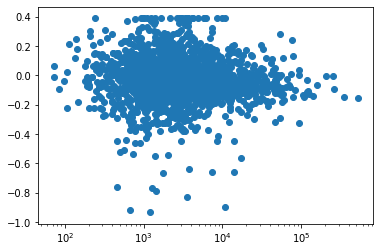

In [74]:
plt.scatter(x="cases",y="spend_all",data=merged)
plt.xscale('log')

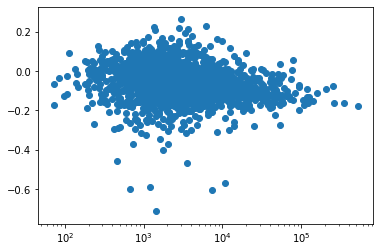

In [64]:
plt.scatter(x="cases",y="spend_all",data=merged)
plt.xscale('log')

In [66]:
se=pd.read_csv('../data/socialexplorer.csv')
census=pd.read_csv('../data/census.csv')

In [67]:
se

,Unnamed: 0,fips,pop,pop_density,median_age,afr,hisp,over65,median_income
0,0,1001,54571,91.80,37.0,17.67,2.40,22.73,29725.0
1,1,1003,182265,114.65,41.1,9.38,4.38,30.23,29802.0
2,2,1005,27457,31.03,39.0,46.89,5.05,27.41,17963.0
3,3,1007,22915,36.81,37.8,22.02,1.77,24.62,21958.0
4,4,1009,57322,88.90,39.0,1.33,8.07,27.42,26976.0
...,...,...,...,...,...,...,...,...,...
3213,3213,72145,59662,1301.07,36.5,11.47,99.26,25.59,NaN
3214,3214,72147,9301,183.21,40.0,28.14,94.34,30.30,NaN
3215,3215,72149,26073,731.63,33.4,8.48,99.65,22.19,NaN
3216,3216,72151,37941,687.16,36.7,14.06,99.33,25.52,NaN


In [129]:
census=census.rename({'id':'fips'},axis=1)

In [130]:
census

,Unnamed: 0,fips,median_age,pop,african_american,median_income,area,pop_density
0,0,1001,38.2,55380,10538,29725.0,594.44,93.163313
1,1,1003,43.0,212830,19718,29802.0,1589.78,133.873869
2,2,1005,40.4,25361,12066,17963.0,884.88,28.660383
3,3,1007,40.9,22493,5014,21958.0,622.58,36.128690
4,4,1009,40.7,57681,928,26976.0,644.78,89.458420
...,...,...,...,...,...,...,...,...
3135,3135,56037,35.3,43521,502,36512.0,10426.65,4.174016
3136,3136,56039,39.3,23280,290,40914.0,3995.38,5.826730
3137,3137,56041,35.8,20479,23,29557.0,2081.26,9.839712
3138,3138,56043,42.9,8027,3,29327.0,2238.55,3.585803


In [131]:
merged=pd.merge(merged,se[["median_age","pop","fips",'pop_density',"afr","hisp","over65"]],on='fips')

In [134]:
merged=pd.merge(census[['fips','median_income']],merged,on="fips")

In [5]:
merged

,Unnamed: 0,fips,median_income,cases,county,state,emp_combined,merchants_all,spend_all,median_age,pop,pop_density,afr,hisp,over65,casesper100k
0,0,1001,29725.0,3300,Autauga,Alabama,NaN,NaN,-0.02,37.0,54571,91.80,17.67,2.40,22.73,3.30e-02
1,1,1003,29802.0,10806,Baldwin,Alabama,1.40e-03,-0.23,-0.06,41.1,182265,114.65,9.38,4.38,30.23,1.08e-01
2,2,1009,26976.0,3776,Blount,Alabama,NaN,NaN,-0.03,39.0,57322,88.90,1.33,8.07,27.42,3.78e-02
3,3,1015,24069.0,7813,Calhoun,Alabama,-4.33e-02,-0.14,-0.03,38.2,118572,195.71,20.56,3.28,27.07,7.81e-02
4,4,1019,23121.0,1197,Cherokee,Alabama,NaN,NaN,-0.14,43.9,25989,46.94,4.65,1.23,32.99,1.20e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,1777,56035,33412.0,540,Sublette,Wyoming,NaN,NaN,-0.10,38.3,10247,2.10,0.31,6.95,23.89,5.40e-03
1778,1778,56037,36512.0,2451,Sweetwater,Wyoming,NaN,NaN,-0.17,32.8,43806,4.20,1.00,15.27,20.07,2.45e-02
1779,1779,56039,40914.0,1905,Teton,Wyoming,-5.64e-02,NaN,-0.12,36.9,21294,5.33,0.23,14.99,22.91,1.91e-02
1780,1780,56041,29557.0,1307,Uinta,Wyoming,NaN,NaN,0.10,33.9,21118,10.15,0.26,8.78,21.02,1.31e-02


In [11]:
merged['casesper100k']=merged['cases']/merged['pop']*100000

In [12]:
merged.to_csv("../data.csv")

In [76]:
merged=pd.read_csv('../data.csv')

In [6]:
merged

,Unnamed: 0,Unnamed: 0.1,fips,median_income,cases,county,state,emp_combined,merchants_all,spend_all,median_age,pop,pop_density,afr,hisp,over65,casesper100k
0,0,0,1001,29725.0,3300,Autauga,Alabama,NaN,NaN,-0.02,37.0,54571,91.80,17.67,2.40,22.73,6047.17
1,1,1,1003,29802.0,10806,Baldwin,Alabama,1.40e-03,-0.23,-0.06,41.1,182265,114.65,9.38,4.38,30.23,5928.73
2,2,2,1009,26976.0,3776,Blount,Alabama,NaN,NaN,-0.03,39.0,57322,88.90,1.33,8.07,27.42,6587.35
3,3,3,1015,24069.0,7813,Calhoun,Alabama,-4.33e-02,-0.14,-0.03,38.2,118572,195.71,20.56,3.28,27.07,6589.25
4,4,4,1019,23121.0,1197,Cherokee,Alabama,NaN,NaN,-0.14,43.9,25989,46.94,4.65,1.23,32.99,4605.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,1777,1777,56035,33412.0,540,Sublette,Wyoming,NaN,NaN,-0.10,38.3,10247,2.10,0.31,6.95,23.89,5269.84
1778,1778,1778,56037,36512.0,2451,Sweetwater,Wyoming,NaN,NaN,-0.17,32.8,43806,4.20,1.00,15.27,20.07,5595.12
1779,1779,1779,56039,40914.0,1905,Teton,Wyoming,-5.64e-02,NaN,-0.12,36.9,21294,5.33,0.23,14.99,22.91,8946.18
1780,1780,1780,56041,29557.0,1307,Uinta,Wyoming,NaN,NaN,0.10,33.9,21118,10.15,0.26,8.78,21.02,6189.03


In [13]:
merged['pop'].sum()

279181865

### EDA

In [4]:
merged['cases']

Index(['Unnamed: 0', 'fips', 'median_income', 'cases', 'county', 'state',
       'emp_combined', 'merchants_all', 'spend_all', 'median_age', 'pop',
       'pop_density', 'afr', 'hisp', 'over65', 'casesper100k'],
      dtype='object')

In [6]:
merged['casesper100k'].max()

5.25651

In [7]:
merged['median_income'].median()

28390.0

In [8]:
merged['highincome']=merged['median_income']>30000

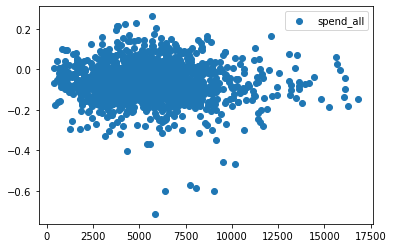

In [8]:
plt.scatter(x="casesper100k",y="spend_all",data=merged)
plt.legend()

In [10]:
merged[]['cases'].max()

SyntaxError: invalid syntax (<ipython-input-10-46410a3c2d38>, line 1)

In [11]:
merged

,Unnamed: 0,fips,median_income,cases,county,state,emp_combined,merchants_all,spend_all,median_age,pop,pop_density,afr,hisp,over65,casesper100k,highincome
0,0,1001,29725.0,3300,Autauga,Alabama,NaN,NaN,-0.02,37.0,54571,91.80,17.67,2.40,22.73,3.30e-02,False
1,1,1003,29802.0,10806,Baldwin,Alabama,1.40e-03,-0.23,-0.06,41.1,182265,114.65,9.38,4.38,30.23,1.08e-01,False
2,2,1009,26976.0,3776,Blount,Alabama,NaN,NaN,-0.03,39.0,57322,88.90,1.33,8.07,27.42,3.78e-02,False
3,3,1015,24069.0,7813,Calhoun,Alabama,-4.33e-02,-0.14,-0.03,38.2,118572,195.71,20.56,3.28,27.07,7.81e-02,False
4,4,1019,23121.0,1197,Cherokee,Alabama,NaN,NaN,-0.14,43.9,25989,46.94,4.65,1.23,32.99,1.20e-02,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,1777,56035,33412.0,540,Sublette,Wyoming,NaN,NaN,-0.10,38.3,10247,2.10,0.31,6.95,23.89,5.40e-03,True
1778,1778,56037,36512.0,2451,Sweetwater,Wyoming,NaN,NaN,-0.17,32.8,43806,4.20,1.00,15.27,20.07,2.45e-02,True
1779,1779,56039,40914.0,1905,Teton,Wyoming,-5.64e-02,NaN,-0.12,36.9,21294,5.33,0.23,14.99,22.91,1.91e-02,True
1780,1780,56041,29557.0,1307,Uinta,Wyoming,NaN,NaN,0.10,33.9,21118,10.15,0.26,8.78,21.02,1.31e-02,False


In [28]:
merged['income_bracket']=pd.qcut(merged['afr'],5)

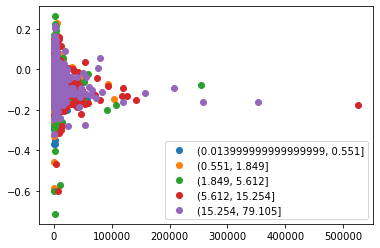

In [29]:
merged.groupby('income_bracket').apply(lambda x:plt.scatter(x['cases'],x['spend_all'],label=x.name,))
plt.legend()
plt.show()

In [35]:
cov

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
826397,2020-12-13,Sweetwater,Wyoming,56037.0,2451,14.0
826398,2020-12-13,Teton,Wyoming,56039.0,1905,2.0
826399,2020-12-13,Uinta,Wyoming,56041.0,1307,7.0
826400,2020-12-13,Washakie,Wyoming,56043.0,638,11.0


In [44]:
spend=spend.rename({'countyfips':'fips'},axis=1)

In [42]:
spend['date']=pd.to_datetime({'year':spend['year'],'month':spend['month'],'day':spend['day']})

In [46]:
cov['date']=pd.to_datetime(cov['date'])

In [48]:
covspend=pd.merge(cov,spend,on=['fips','date'])

In [52]:
corr=covspend.groupby('fips').apply(lambda x: x[['spend_all','cases']].corr().values[1][0])

In [54]:
corr.min()

-0.7719910968612936

In [55]:
When binning data on different covariates how do we handle 
Can we do correlation of time series?

SyntaxError: invalid syntax (<ipython-input-55-e3d6565e05ab>, line 1)

# Daywise data

In [23]:
cases=pd.read_csv("../data/covid.csv")

In [24]:
cases=cases.sort_values(["fips","date"]).reset_index(drop=True)

In [25]:
cases

,date,county,state,fips,cases,deaths
0,2020-03-24,Autauga,Alabama,1001.0,1,0.0
1,2020-03-25,Autauga,Alabama,1001.0,4,0.0
2,2020-03-26,Autauga,Alabama,1001.0,6,0.0
3,2020-03-27,Autauga,Alabama,1001.0,6,0.0
4,2020-03-28,Autauga,Alabama,1001.0,6,0.0
...,...,...,...,...,...,...
826397,2020-12-13,Unknown,Rhode Island,NaN,10887,90.0
826398,2020-12-13,Unknown,Tennessee,NaN,2087,33.0
826399,2020-12-13,Unknown,Utah,NaN,668,4.0
826400,2020-12-13,Unknown,Vermont,NaN,8,0.0


In [26]:
cases['new_cases']=cases.groupby('fips',sort=False)['cases'].apply(lambda x:x.diff())

In [27]:
cases

,date,county,state,fips,cases,deaths,new_cases
0,2020-03-24,Autauga,Alabama,1001.0,1,0.0,NaN
1,2020-03-25,Autauga,Alabama,1001.0,4,0.0,3.0
2,2020-03-26,Autauga,Alabama,1001.0,6,0.0,2.0
3,2020-03-27,Autauga,Alabama,1001.0,6,0.0,0.0
4,2020-03-28,Autauga,Alabama,1001.0,6,0.0,0.0
...,...,...,...,...,...,...,...
826397,2020-12-13,Unknown,Rhode Island,NaN,10887,90.0,NaN
826398,2020-12-13,Unknown,Tennessee,NaN,2087,33.0,NaN
826399,2020-12-13,Unknown,Utah,NaN,668,4.0,NaN
826400,2020-12-13,Unknown,Vermont,NaN,8,0.0,NaN


In [28]:
cases['date']=pd.to_datetime(cases['date'])

In [29]:
spend=pd.read_csv("../data/EconomicTracker-main/Affinity - County - Daily.csv").rename({"countyfips":"fips"},axis=1)
spend=spend[(spend['freq']=='d')&(spend['spend_all'].notna())]#[['spend_all','countyfips']]
emp= pd.read_csv("../data/EconomicTracker-main/Employment Combined - County - Daily.csv").rename({"countyfips":"fips"},axis=1)
emp['emp_combined']=emp['emp_combined'].apply(lambda x: None if x=='.' else float(x))
emp=emp.dropna().reset_index(drop=True)
sme= pd.read_csv("../data/EconomicTracker-main/Womply Revenue - County - Daily.csv").rename({"countyfips":"fips"},axis=1)
sme['date']=pd.to_datetime(dict(year=sme['year'],month=sme['month'],day=sme['day']))
emp['date']=pd.to_datetime(dict(year=emp['year'],month=emp['month'],day=emp['day']))
spend['date']=pd.to_datetime(dict(year=spend['year'],month=spend['month'],day=spend['day']))
sme.drop(['year','month','day'],axis=1,inplace=True)
spend.drop(['year','month','day'],axis=1,inplace=True)
emp.drop(['year','month','day','emp_combined_inchigh','emp_combined_incmiddle'],axis=1,inplace=True)
economictracker=pd.merge(pd.merge(emp,sme,on=["fips","date"],how="outer"),spend,on=["fips","date"],how="outer")

In [30]:
merged=pd.merge(cases,economictracker,on=['date','fips'])

In [31]:
merged=merged[merged['freq']=='d'].drop(['freq','provisional'],axis=1).reset_index(drop=True)

In [32]:
merged['new_cases']=merged['new_cases'].fillna(0)

In [34]:
merged.groupby("fips").apply(lambda x: x.to_csv("../dailydata/"+str(int(x.name))+".csv"))

""


In [97]:
merged.to_csv("../dailydata/data-daily.csv")

# Monthly Data

In [35]:
merged

,date,county,state,fips,cases,deaths,new_cases,emp_combined,emp_combined_inclow,revenue_all,spend_all
0,2020-03-24,Autauga,Alabama,1001.0,1,0.0,0.0,NaN,NaN,NaN,-5.69e-02
1,2020-03-25,Autauga,Alabama,1001.0,4,0.0,3.0,NaN,NaN,NaN,-2.25e-01
2,2020-03-26,Autauga,Alabama,1001.0,6,0.0,2.0,NaN,NaN,NaN,-1.59e-01
3,2020-03-27,Autauga,Alabama,1001.0,6,0.0,0.0,NaN,NaN,NaN,-2.10e-01
4,2020-03-28,Autauga,Alabama,1001.0,6,0.0,0.0,NaN,NaN,NaN,-3.60e-01
...,...,...,...,...,...,...,...,...,...,...,...
386650,2020-11-18,Weston,Wyoming,56045.0,353,0.0,7.0,NaN,NaN,NaN,1.81e-01
386651,2020-11-19,Weston,Wyoming,56045.0,355,0.0,2.0,NaN,NaN,NaN,1.96e-01
386652,2020-11-20,Weston,Wyoming,56045.0,364,0.0,9.0,NaN,NaN,NaN,1.39e-01
386653,2020-11-21,Weston,Wyoming,56045.0,366,0.0,2.0,NaN,NaN,NaN,6.44e-02


In [36]:
merged['month']=merged['date'].apply(lambda x:x.month)
merged['year']=merged['date'].apply(lambda x:x.year)


In [37]:
merged

,date,county,state,fips,cases,deaths,new_cases,emp_combined,emp_combined_inclow,revenue_all,spend_all,month,year
0,2020-03-24,Autauga,Alabama,1001.0,1,0.0,0.0,NaN,NaN,NaN,-5.69e-02,3,2020
1,2020-03-25,Autauga,Alabama,1001.0,4,0.0,3.0,NaN,NaN,NaN,-2.25e-01,3,2020
2,2020-03-26,Autauga,Alabama,1001.0,6,0.0,2.0,NaN,NaN,NaN,-1.59e-01,3,2020
3,2020-03-27,Autauga,Alabama,1001.0,6,0.0,0.0,NaN,NaN,NaN,-2.10e-01,3,2020
4,2020-03-28,Autauga,Alabama,1001.0,6,0.0,0.0,NaN,NaN,NaN,-3.60e-01,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386650,2020-11-18,Weston,Wyoming,56045.0,353,0.0,7.0,NaN,NaN,NaN,1.81e-01,11,2020
386651,2020-11-19,Weston,Wyoming,56045.0,355,0.0,2.0,NaN,NaN,NaN,1.96e-01,11,2020
386652,2020-11-20,Weston,Wyoming,56045.0,364,0.0,9.0,NaN,NaN,NaN,1.39e-01,11,2020
386653,2020-11-21,Weston,Wyoming,56045.0,366,0.0,2.0,NaN,NaN,NaN,6.44e-02,11,2020


In [38]:
merged.groupby(["county","state","fips"]).tail(1).reset_index()

,index,date,county,state,fips,cases,deaths,new_cases,emp_combined,emp_combined_inclow,revenue_all,spend_all,month,year
0,243,2020-11-22,Autauga,Alabama,1001.0,2617,39.0,20.0,NaN,NaN,NaN,-3.96e-02,11,2020
1,497,2020-11-22,Baldwin,Alabama,1003.0,8199,84.0,68.0,NaN,NaN,-0.27,3.05e-02,11,2020
2,740,2020-11-22,Blount,Alabama,1009.0,2754,36.0,19.0,NaN,NaN,NaN,2.42e-02,11,2020
3,990,2020-11-22,Calhoun,Alabama,1015.0,5964,113.0,40.0,NaN,NaN,-0.14,5.51e-02,11,2020
4,1233,2020-11-22,Cherokee,Alabama,1019.0,985,24.0,6.0,NaN,NaN,NaN,-6.02e-02,11,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,385745,2020-11-22,Sublette,Wyoming,56035.0,374,1.0,5.0,NaN,NaN,NaN,1.12e-03,11,2020
1583,385989,2020-11-22,Sweetwater,Wyoming,56037.0,1421,6.0,43.0,NaN,NaN,NaN,-2.66e-01,11,2020
1584,386239,2020-11-22,Teton,Wyoming,56039.0,1371,2.0,11.0,NaN,NaN,NaN,-4.59e-02,11,2020
1585,386474,2020-11-22,Uinta,Wyoming,56041.0,920,4.0,19.0,NaN,NaN,NaN,1.19e-01,11,2020


In [40]:
merged_monthly=merged.groupby(["month","county","state","fips"]).median().reset_index()
merged_year=merged.groupby(["county","state","fips"]).tail(1).reset_index()

In [41]:
se=pd.read_csv('../data/socialexplorer.csv')


In [42]:
merged_monthly=pd.merge(merged_monthly,se[["median_income","median_age","pop","fips",'pop_density',"afr","hisp","over60"]],on='fips')
merged_year=pd.merge(merged_year,se[["median_income","median_age","pop","fips",'pop_density',"afr","hisp","over60"]],on='fips')

In [43]:
merged[merged['month']==4]

,date,county,state,fips,cases,deaths,new_cases,emp_combined,emp_combined_inclow,revenue_all,spend_all,month,year
8,2020-04-01,Autauga,Alabama,1001.0,10,0.0,3.0,NaN,NaN,NaN,-0.26,4,2020
9,2020-04-02,Autauga,Alabama,1001.0,10,0.0,0.0,NaN,NaN,NaN,-0.35,4,2020
10,2020-04-03,Autauga,Alabama,1001.0,12,0.0,2.0,NaN,NaN,NaN,-0.26,4,2020
11,2020-04-04,Autauga,Alabama,1001.0,12,0.0,0.0,NaN,NaN,NaN,-0.13,4,2020
12,2020-04-05,Autauga,Alabama,1001.0,12,0.0,0.0,NaN,NaN,NaN,-0.28,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386264,2020-04-26,Uinta,Wyoming,56041.0,7,0.0,0.0,NaN,NaN,NaN,-0.26,4,2020
386265,2020-04-27,Uinta,Wyoming,56041.0,7,0.0,0.0,NaN,NaN,NaN,-0.29,4,2020
386266,2020-04-28,Uinta,Wyoming,56041.0,8,0.0,1.0,NaN,NaN,NaN,-0.25,4,2020
386267,2020-04-29,Uinta,Wyoming,56041.0,8,0.0,0.0,NaN,NaN,NaN,-0.14,4,2020


In [44]:
merged_monthly['casesper100k']=merged_monthly['cases']/merged_monthly['pop']*100000
merged_year['casesper100k']=merged_year['cases']/merged_year['pop']*100000
merged_monthly['casesper100klog']=merged_monthly['casesper100k'].apply(np.log10)
merged_year['casesper100klog']=merged_year['casesper100k'].apply(np.log10)

In [45]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [46]:
merged_monthly['region']=merged_monthly['state'].apply(lambda x: us_state_abbrev[x])
merged_year['region']=merged_year['state'].apply(lambda x: us_state_abbrev[x])

In [47]:
merged_monthly

,month,county,state,fips,cases,deaths,new_cases,emp_combined,revenue_all,spend_all,...,median_income,median_age,pop,pop_density,afr,hisp,over60,casesper100k,casesper100klog,region
0,1,Cook,Illinois,17031.0,1.0,0.0,0.0,6.95e-03,0.02,-3.83e-02,...,32955.0,35.3,5194675,5495.11,24.79,23.96,16.89,0.02,-1.72,IL
1,2,Cook,Illinois,17031.0,2.0,0.0,0.0,1.27e-02,-0.02,-1.87e-02,...,32955.0,35.3,5194675,5495.11,24.79,23.96,16.89,0.04,-1.41,IL
2,3,Cook,Illinois,17031.0,76.0,0.0,25.0,-2.29e-03,-0.18,-7.67e-02,...,32955.0,35.3,5194675,5495.11,24.79,23.96,16.89,1.46,0.17,IL
3,4,Cook,Illinois,17031.0,17696.5,676.0,993.5,-1.79e-01,-0.48,-3.55e-01,...,32955.0,35.3,5194675,5495.11,24.79,23.96,16.89,340.67,2.53,IL
4,5,Cook,Illinois,17031.0,61212.0,2814.0,1398.0,-1.53e-01,-0.41,-2.65e-01,...,32955.0,35.3,5194675,5495.11,24.79,23.96,16.89,1178.36,3.07,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13946,11,Butte,Idaho,16023.0,112.0,0.0,0.0,NaN,NaN,8.17e-02,...,25764.0,41.7,2891,1.30,0.21,4.12,24.35,3874.09,3.59,ID
13947,8,Rawlins,Kansas,20153.0,1.0,0.0,0.0,NaN,NaN,2.64e-01,...,27957.0,51.3,2519,2.36,0.32,3.18,34.26,39.70,1.60,KS
13948,9,Rawlins,Kansas,20153.0,7.0,0.0,0.0,NaN,NaN,-6.98e-02,...,27957.0,51.3,2519,2.36,0.32,3.18,34.26,277.89,2.44,KS
13949,10,Rawlins,Kansas,20153.0,113.0,0.0,0.0,NaN,NaN,-3.91e-02,...,27957.0,51.3,2519,2.36,0.32,3.18,34.26,4485.91,3.65,KS


In [110]:
#merged=merged.drop(merged.columns[[0,1]],axis=1)

In [48]:
merged_monthly['pct_min']=(merged_monthly['afr']+merged_monthly['hisp'])
merged_year['pct_min']=(merged_year['afr']+merged_year['hisp'])

In [49]:
merged_year=merged_year.drop(['afr','hisp'],axis=1)
merged_monthly=merged_monthly.drop(['afr','hisp'],axis=1)

In [150]:
merged_monthly['new_cases_per100k']=merged_monthly.groupby('fips',sort=False)['casesper100k'].apply(lambda x:x.diff())
merged_year['new_cases_per100k']=merged_year.groupby('fips',sort=False)['casesper100k'].apply(lambda x:x.diff())

,month,county,state,fips,cases,deaths,new_cases,emp_combined,revenue_all,spend_all,year,median_income,median_age,pop,pop_density,over60,casesper100k,region,pct_min,new_cases_per100k
0,1,Cook,Illinois,17031.0,1.0,0.0,0.0,6.95e-03,0.02,-3.83e-02,2020.0,32955.0,35.3,5194675,5495.11,16.89,0.02,IL,48.75,NaN
1,2,Cook,Illinois,17031.0,2.0,0.0,0.0,1.27e-02,-0.02,-1.87e-02,2020.0,32955.0,35.3,5194675,5495.11,16.89,0.04,IL,48.75,0.02
2,3,Cook,Illinois,17031.0,76.0,0.0,25.0,-2.29e-03,-0.18,-7.67e-02,2020.0,32955.0,35.3,5194675,5495.11,16.89,1.46,IL,48.75,1.42
3,4,Cook,Illinois,17031.0,17696.5,676.0,993.5,-1.79e-01,-0.48,-3.55e-01,2020.0,32955.0,35.3,5194675,5495.11,16.89,340.67,IL,48.75,339.20
4,5,Cook,Illinois,17031.0,61212.0,2814.0,1398.0,-1.53e-01,-0.41,-2.65e-01,2020.0,32955.0,35.3,5194675,5495.11,16.89,1178.36,IL,48.75,837.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13946,11,Butte,Idaho,16023.0,112.0,0.0,0.0,NaN,NaN,8.17e-02,2020.0,25764.0,41.7,2891,1.30,24.35,3874.09,ID,4.32,1245.24
13947,8,Rawlins,Kansas,20153.0,1.0,0.0,0.0,NaN,NaN,2.64e-01,2020.0,27957.0,51.3,2519,2.36,34.26,39.70,KS,3.49,NaN
13948,9,Rawlins,Kansas,20153.0,7.0,0.0,0.0,NaN,NaN,-6.98e-02,2020.0,27957.0,51.3,2519,2.36,34.26,277.89,KS,3.49,238.19
13949,10,Rawlins,Kansas,20153.0,113.0,0.0,0.0,NaN,NaN,-3.91e-02,2020.0,27957.0,51.3,2519,2.36,34.26,4485.91,KS,3.49,4208.02


In [155]:
merged_daily

,month,county,state,fips,cases,deaths,new_cases,emp_combined,merchants_all,spend_all,year
0,1,Cook,Illinois,17031.0,1.0,0.0,0.0,6.95e-03,-2.12e-02,-3.83e-02,2020.0
1,1,Los Angeles,California,6037.0,1.0,0.0,0.0,8.97e-03,-2.35e-03,-2.12e-02,2020.0
2,1,Maricopa,Arizona,4013.0,1.0,0.0,0.0,6.58e-03,-3.75e-03,-5.86e-03,2020.0
3,1,Orange,California,6059.0,1.0,0.0,0.0,6.11e-03,-8.75e-03,-2.23e-02,2020.0
4,1,Santa Clara,California,6085.0,1.0,0.0,NaN,1.03e-02,-1.40e-02,-1.37e-02,2020.0
...,...,...,...,...,...,...,...,...,...,...,...
13946,11,York,Pennsylvania,42133.0,7671.0,220.5,117.0,NaN,-3.83e-01,-5.89e-01,2020.0
13947,11,York,South Carolina,45091.0,7791.0,116.0,104.5,NaN,-2.91e-01,-6.61e-02,2020.0
13948,11,York,Virginia,51199.0,718.5,9.0,8.0,NaN,NaN,-3.99e-02,2020.0
13949,11,Yuba,California,6115.0,1511.5,10.0,14.0,NaN,NaN,-3.40e-02,2020.0


In [ ]:
merged_monthly['popdensity']

In [61]:
merged_monthly[(merged_monthly['pop_density']<=1.82)&(merged_monthly['region']=='CA')]

,month,county,state,fips,cases,deaths,new_cases,emp_combined,revenue_all,spend_all,year,median_income,median_age,pop,pop_density,over60,casesper100k,casesper100klog,region,pct_min


In [50]:
merged_monthly.to_csv("../data-monthly.csv")
merged_year.to_csv("../data-yearly.csv")

In [3]:
merged_monthly=pd.read_csv("../data-monthly.csv",index_col=0)

In [4]:
merged_monthly

,month,county,state,fips,cases,deaths,new_cases,emp_combined,revenue_all,spend_all,year,median_income,median_age,pop,pop_density,over60,casesper100k,casesper100klog,region,pct_min
0,1,Cook,Illinois,17031.0,1.0,0.0,0.0,6.95e-03,0.02,-3.83e-02,2020.0,32955.0,35.3,5194675,5495.11,16.89,0.02,-1.72,IL,48.75
1,2,Cook,Illinois,17031.0,2.0,0.0,0.0,1.27e-02,-0.02,-1.87e-02,2020.0,32955.0,35.3,5194675,5495.11,16.89,0.04,-1.41,IL,48.75
2,3,Cook,Illinois,17031.0,76.0,0.0,25.0,-2.29e-03,-0.18,-7.67e-02,2020.0,32955.0,35.3,5194675,5495.11,16.89,1.46,0.17,IL,48.75
3,4,Cook,Illinois,17031.0,17696.5,676.0,993.5,-1.79e-01,-0.48,-3.55e-01,2020.0,32955.0,35.3,5194675,5495.11,16.89,340.67,2.53,IL,48.75
4,5,Cook,Illinois,17031.0,61212.0,2814.0,1398.0,-1.53e-01,-0.41,-2.65e-01,2020.0,32955.0,35.3,5194675,5495.11,16.89,1178.36,3.07,IL,48.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13946,11,Butte,Idaho,16023.0,112.0,0.0,0.0,NaN,NaN,8.17e-02,2020.0,25764.0,41.7,2891,1.30,24.35,3874.09,3.59,ID,4.32
13947,8,Rawlins,Kansas,20153.0,1.0,0.0,0.0,NaN,NaN,2.64e-01,2020.0,27957.0,51.3,2519,2.36,34.26,39.70,1.60,KS,3.49
13948,9,Rawlins,Kansas,20153.0,7.0,0.0,0.0,NaN,NaN,-6.98e-02,2020.0,27957.0,51.3,2519,2.36,34.26,277.89,2.44,KS,3.49
13949,10,Rawlins,Kansas,20153.0,113.0,0.0,0.0,NaN,NaN,-3.91e-02,2020.0,27957.0,51.3,2519,2.36,34.26,4485.91,3.65,KS,3.49


In [29]:
pop_rankings=merged_monthly[merged_monthly['month']==11].groupby("region")['pop_density'].apply(lambda x:pd.DataFrame(np.array([x.quantile(5/x.shape[0]),x.quantile(1-5/x.shape[0])]).reshape(1,2),columns=['low','high']) if x.shape[0]>=10 else pd.DataFrame(np.array([x.median(),x.median()]).reshape(1,2),columns=['low','high']) ).reset_index().drop("level_1",axis=1)


In [30]:
x=merged_monthly[merged_monthly['month']==11]['pop_density']
pop_rankings=pop_rankings.append({'region':"ALL",'low':x.quantile(5/x.shape[0]),'high':x.quantile(1-5/x.shape[0])},ignore_index=True )

In [33]:
pop_rankings=pop_rankings.set_index('region')

In [35]:
pop_rankings.to_json("../pop_rankings.json",orient="index")

In [7]:
merged_monthly['cases'].quantile(np.linspace(.1, 1, merged[''], 0), 'lower')

NameError: name 'merged' is not defined